In [1]:
import pandas as pd
import numpy as np

# Data Viz library
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
Titanic= pd.read_excel('Titanictrain.xlsx', sheet_name = 'Train')


# ดูข้อมูล head 5 บรรทัดแรก

Titanic.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [ ]:
#Titanic

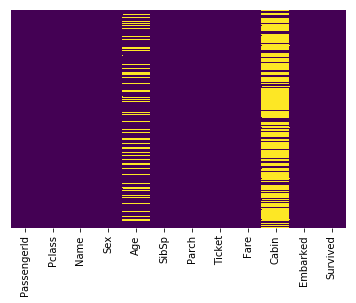

In [3]:
# ตรวจสอบ Missing value ด้วย heatmap

# หากข้อมูลมี Missing สามารถจัดการได้ตามบทเรียนที่ผ่านมา
sns.heatmap(Titanic.isnull(), yticklabels=False, cbar = False, cmap= 'viridis')

In [4]:
Titanic.replace([np.inf, -np.inf], np.nan)

Titanic.isnull().any() # function check ค่าว่าง ถ้ามีค่าว่าง return true

PassengerId    False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
Survived       False
dtype: bool

In [5]:
# Fill in the "holes"
# Or remove the holes if the missing data is more than 20% of the data
# Fill in categorial data with the most occurring category
Titanic['Age'].mode()

def Age (x):
     if pd.isnull(x):
        return Titanic['Age'].mean()
     else:
        return x
    
Titanic['Age'] = Titanic['Age'].apply(Age )

# sns.heatmap(loan.isnull(), yticklabels=False, cbar=False, cmap='viridis')
Titanic.isnull().any()

PassengerId    False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
Survived       False
dtype: bool

In [6]:
# นับความถี่ของ Quality ที่แยกเป็น "loyal"& "churn" 

pd.value_counts(Titanic["Embarked"], sort=True)

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [7]:
# Fill in the "holes"
# Or remove the holes if the missing data is more than 20% of the data
# Fill in categorial data with the most occurring category
Titanic['Embarked'] .value_counts()

def impute_Embarked (x):
     if pd.isnull(x):
        return  'S'
     else:
        return x
    
Titanic['Embarked'] = Titanic['Embarked'].apply(impute_Embarked)

# sns.heatmap(loan.isnull(), yticklabels=False, cbar=False, cmap='viridis')
Titanic.isnull().any()

PassengerId    False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked       False
Survived       False
dtype: bool

In [8]:
pd.value_counts(Titanic["Embarked"], sort=True)

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [9]:
X = Titanic.drop(columns=['Name','Ticket','Cabin','Cabin','Survived'],axis=1)
y = Titanic ['Survived']

In [10]:
X.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,3,male,22.0,1,0,7.2500,S
1,2,1,female,38.0,1,0,71.2833,C
2,3,3,female,26.0,0,0,7.9250,S
3,4,1,female,35.0,1,0,53.1000,S
4,5,3,male,35.0,0,0,8.0500,S


In [11]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [12]:
X = pd.get_dummies(X, columns=['Sex', 'Embarked'])
X.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,3,22.0,1,0,7.2500,0,1,0,0,1
1,2,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,3,26.0,0,0,7.9250,1,0,0,0,1
3,4,1,35.0,1,0,53.1000,1,0,0,0,1
4,5,3,35.0,0,0,8.0500,0,1,0,0,1


In [13]:
# ใช้วิธี Hold out แบ่ง Test 30 และ Train 70

from sklearn.model_selection import train_test_split

In [14]:
# กด  shift + tab หลังคำว่า split แล้วกดเครื่องหมาย + เพื่อดูตัวอย่างคำสั่งการแบ่งชุดข้อมูล

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=np.random)

In [15]:
from sklearn.linear_model import LogisticRegression

In [16]:
logisM = LogisticRegression()

In [17]:
logisM.fit(X_train, y_train)

C:\Python Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [18]:
# ทำนายค่าในชุด test set ที่แบ่งไว้ 30%
pred = logisM.predict(X_test)

In [19]:
from sklearn.metrics import classification_report

In [20]:
# สั่งพิมพ์รายงาน ค่าการวัดผล และประสิทธิภาพการทำนายของตัวแบบ

print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.87      0.88      0.87       176
           1       0.76      0.74      0.75        92

    accuracy                           0.83       268
   macro avg       0.81      0.81      0.81       268
weighted avg       0.83      0.83      0.83       268



In [21]:
pred

array([0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0], dtype=int64)

In [22]:
# แปลงค่า array ของผล pred ให้เป็น DataFrame
# ตั้งชื่อ columns ว่า 'Predict'

columns_new = ['Predict']

# pass in array and columns
prediction = pd.DataFrame(pred, columns=columns_new)
prediction.head()

,Predict
0,0
1,0
2,0
3,1
4,0


In [23]:
y_test

232    0
116    0
266    0
389    1
536    0
300    1
110    0
554    1
259    1
740    1
675    0
409    0
550    1
294    0
530    1
521    0
772    0
84     1
764    0
602    0
459    0
465    0
858    1
724    1
881    0
751    1
231    0
42     0
729    0
569    1
      ..
26     0
220    1
52     1
286    1
155    0
357    0
277    0
191    0
274    1
534    0
38     0
51     0
207    1
850    0
450    0
537    1
598    0
728    0
347    1
355    0
382    0
547    1
808    0
790    0
83     0
426    1
93     0
687    0
458    1
493    0
Name: Survived, Length: 268, dtype: int64

In [24]:
y_test.reset_index(drop=True, inplace=True)

y_test

0      0
1      0
2      0
3      1
4      0
5      1
6      0
7      1
8      1
9      1
10     0
11     0
12     1
13     0
14     1
15     0
16     0
17     1
18     0
19     0
20     0
21     0
22     1
23     1
24     0
25     1
26     0
27     0
28     0
29     1
      ..
238    0
239    1
240    1
241    1
242    0
243    0
244    0
245    0
246    1
247    0
248    0
249    0
250    1
251    0
252    0
253    1
254    0
255    0
256    1
257    0
258    0
259    1
260    0
261    0
262    0
263    1
264    0
265    0
266    1
267    0
Name: Survived, Length: 268, dtype: int64

In [ ]:
#result = pd.concat([y_test,prediction], axis = 1)
#result

In [26]:
from sklearn.linear_model import LogisticRegression

In [28]:
from sklearn.model_selection import GridSearchCV

# Create the parameter grid based on the results of random search 
param_grid = {
    'C': [1,5,10],
}

# Create a based model
logisM = LogisticRegression()

# Instantiate the grid search model
grid_search = GridSearchCV( estimator = logisM,param_grid = param_grid, verbose = 3)

In [29]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)


Fitting 3 folds for each of 3 candidates, totalling 9 fits
[CV] C=1 .............................................................
[CV] ................................. C=1, score=0.794, total=   0.0s
[CV] C=1 .............................................................
[CV] ................................. C=1, score=0.734, total=   0.0s
[CV] C=1 .............................................................
[CV] ................................. C=1, score=0.845, total=   0.0s
[CV] C=5 .............................................................
[CV] ................................. C=5, score=0.799, total=   0.0s
[CV] C=5 .............................................................
[CV] ................................. C=5, score=0.739, total=   0.0s
[CV] C=5 .............................................................
[CV] ................................. C=5, score=0.841, total=   0.0s
[CV] C=10 ............................................................
[CV] .............

C:\Python Anaconda\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Python Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
C:\Python Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
C:\Python Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None, param_grid={'C': [1, 5, 10]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [30]:
# ดู default parameter

grid_search.best_estimator_

LogisticRegression(C=5, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [31]:
logisMfine = LogisticRegression(C=5, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [32]:
# สร้าง Model "rf_fine"

logisMfine.fit(X_train, y_train)

C:\Python Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=5, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [33]:
# ทำนายค่าในชุด test set ที่แบ่งไว้ 30%

predictionfine = logisMfine.predict(X_test)

In [34]:
# นำเข้า classification report และ confusion matrix

from sklearn.metrics import classification_report, confusion_matrix

In [35]:
# สั่งพิมพ์รายงาน ค่าการวัดผล และประสิทธิภาพการทำนายของตัวแบบ และค่าใน confusion matrix

print(classification_report(y_test, predictionfine))
print('\n')
print(confusion_matrix(y_test, predictionfine))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86       176
           1       0.73      0.73      0.73        92

    accuracy                           0.81       268
   macro avg       0.79      0.79      0.79       268
weighted avg       0.81      0.81      0.81       268



[[151  25]
 [ 25  67]]


In [36]:
# แปลงค่า array ของผล pred ให้เป็น DataFrame
# ตั้งชื่อ columns ว่า 'Predict'

columns_new = ['Predictnew']

# pass in array and columns
predictionnew = pd.DataFrame(predictionfine, columns=columns_new)
predictionnew.head()

,Predictnew
0,0
1,0
2,0
3,1
4,0


In [37]:
y_test

0      0
1      0
2      0
3      1
4      0
5      1
6      0
7      1
8      1
9      1
10     0
11     0
12     1
13     0
14     1
15     0
16     0
17     1
18     0
19     0
20     0
21     0
22     1
23     1
24     0
25     1
26     0
27     0
28     0
29     1
      ..
238    0
239    1
240    1
241    1
242    0
243    0
244    0
245    0
246    1
247    0
248    0
249    0
250    1
251    0
252    0
253    1
254    0
255    0
256    1
257    0
258    0
259    1
260    0
261    0
262    0
263    1
264    0
265    0
266    1
267    0
Name: Survived, Length: 268, dtype: int64

In [38]:

resultnew = pd.concat([y_test,predictionnew], axis = 1)
resultnew

,Survived,Predictnew
0,0,0
1,0,0
2,0,0
3,1,1
4,0,0
5,1,1
6,0,0
7,1,1
8,1,1
9,1,0
